## XQUERY

-- Site
http://videlibri.sourceforge.net/cgi-bin/xidelcgi

--Modelo Lógico
PATIENT(id_patient, attributes, items, id_disease)
CHE: items para ITEMS(items)
CHE: attributes para ATTRIBUTES(attributes)
CHE: id_disease para SUBDISEASE(id_disease)
ITEM (name)
ATTRIBUTE (name)
ITEMS(items, item)
CHE: item para ITEM(nome)
ATTRIBUTES(attributes, attribute)
CHE: attribute para ATTRIBUTE(nome)
DISEASES(diseases, name_disease)
CHE: name_disease para DISEASE(name_disease)
DISEASE(name_disease, id_disease)
CHE: id_disease para SUBDISEASE(id_disease)
SUBDISEASE(id_disease, name)

--Modelo Conceitual

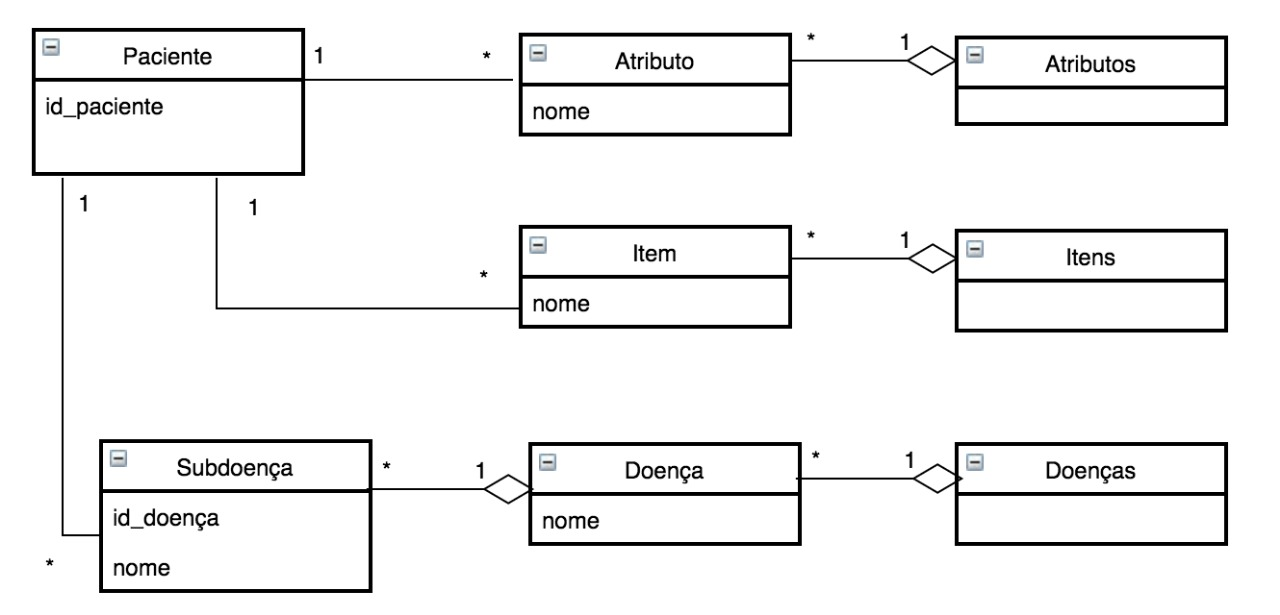

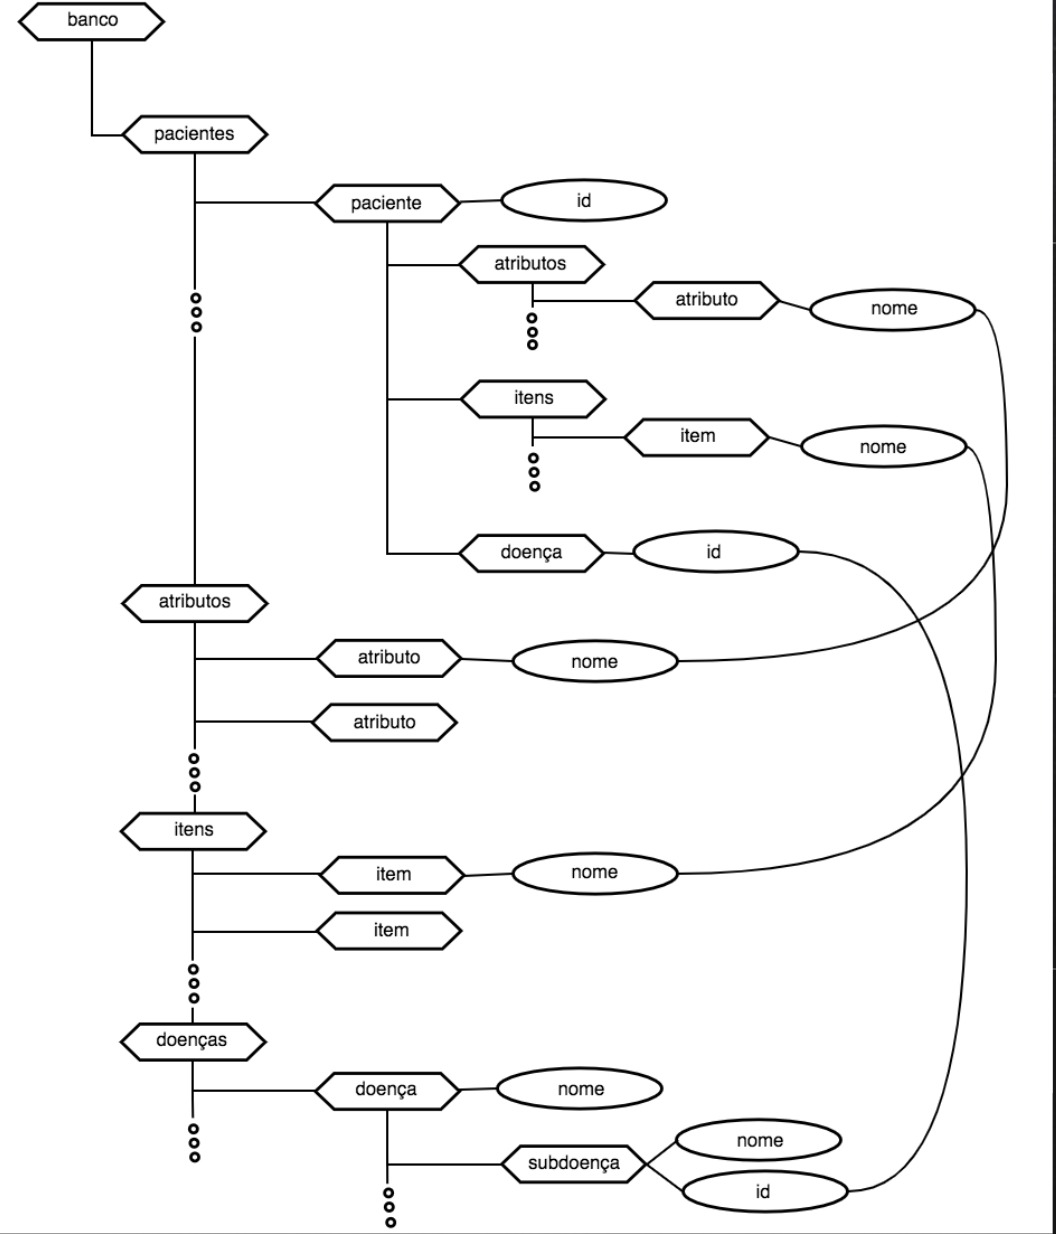


In [ ]:
-- Retornar quantidade de itens com seus respectivos nomes
xquery version "1.0";
let $banco := banco
for $i in ($banco/items/item)
return concat(data($i/@name),' ',count($banco//patient//item[@name = data($i/@name)])) 

-- Resultado
hypopituitary 2
tsh 5032
t3 4430
tt4 5232
t4u 5006
fti 0

--Retornar quantidade de atributos com seus respectivos nomes
xquery version "1.0";
let $banco := banco
for $i in ($banco/attributes/attribute)
return concat(data($i/@name),' ',count($banco//patient//attribute[@name = data($i/@name)]))

--Resultado
age 5598
male 0
female 0
pregnant 82
tumor 142
sick 220
psych 270
goitre 50

--Pacientes com hipotireode e tsh> 4
xquery version "1.0";
let $banco := banco
let $doencas := $banco/diseases
for $x in ($doencas/disease), $z in ($banco//patient), $i in ($z//item)
where data($x/@name) = "hypothyroid" and $z//disease[@id_disease = $x/subdisease/@id_disease]
and data($i/@name) = "tsh" and (xs:double($i) > 4.0)
return data($z/@id_patient)


--Pacientes com hipotireode
xquery version "1.0";
let $banco := banco
let $doencas := $banco/diseases
for $x in ($doencas/disease), $z in ($banco//patient)
where data($x/@name) = "hypothyroid" and $z//disease[@id_disease = $x/subdisease/@id_disease]
return data($z/@id_patient)

--Resultado: mesmos pacientes

--Pacientes com hipertireode e tsh< 0.3
xquery version "1.0";
let $banco := banco
let $doencas := $banco/diseases
for $x in ($doencas/disease), $z in ($banco//patient), $i in ($z//item)
where data($x/@name) = "hyperthyroid" and $z//disease[@id_disease = $x/subdisease/@id_disease]
and data($i/@name) = "tsh" and (xs:double($i) < 0.3)
return data($z/@id_patient)

--Pacientes com hipertireoide
xquery version "1.0";
let $banco := banco
let $doencas := $banco/diseases
for $x in ($doencas/disease), $z in ($banco//patient)
where data($x/@name) = "hyperthyroid" and $z//disease[@id_disease = $x/subdisease/@id_disease]
return data($z/@id_patient)


--Resultado: mesmos pacientes

--Media de TSH
xquery version "1.0";
let $banco := banco
let $doencas := $banco/diseases
for $x in ($banco//patient)
where count($x//attribute) > 3 and $x//attribute[@name="age"] and 
$x//attribute[@name="pregnant"] and $x//attribute[@name="tumor"]
return $x//item[@name = "tsh"]

--Resultado
<item name="tsh">0.45</item>
<item name="tsh">0.2</item>
<item name="tsh">0.04</item>
<item name="tsh">0.83</item>
<item name="tsh">1.4</item>
<item name="tsh">0.45</item>
<item name="tsh">0.2</item>
<item name="tsh">0.04</item>
<item name="tsh">0.83</item>
<item name="tsh">1.4</item>

xquery version "1.0";
let $banco := items
return avg($banco//item)

--Resultado: 0.584

--Pacientes com idade menor que a média
xquery version "1.0";
let $banco := banco
let $pacientes := $banco//patient
let $avgidade := avg($pacientes//attribute[@name = "age"])
for $x in ($banco//patient)
where count($x//attribute) > 3 and (($x//attribute[@name="age"]) < $avgidade) 
and 
$x//attribute[@name="pregnant"] and $x//attribute[@name="tumor"]
return ($x)

--Resultado:
<patient id_patient="241">
  <disease id_disease="dis1"/>
  <attributes>
      <attribute name="age">19</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.45</item>
      <item name="t3">3.2</item>
      <item name="tt4">130</item>
      <item name="t4u">1.83</item>
  </items>
</patient>
<patient id_patient="365">
  <attributes>
      <attribute name="age">25</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="t3">2.2</item>
      <item name="tt4">113</item>
      <item name="t4u">1.08</item>
  </items>
</patient>
<patient id_patient="677">
  <attributes>
      <attribute name="age">21</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.2</item>
      <item name="t3">2.5</item>
      <item name="tt4">108</item>
      <item name="t4u">1.13</item>
  </items>
</patient>
<patient id_patient="789">
  <attributes>
      <attribute name="age">36</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.04</item>
      <item name="tt4">149</item>
      <item name="t4u">1.65</item>
  </items>
</patient>
<patient id_patient="1976">
  <disease id_disease="dis3"/>
  <attributes>
      <attribute name="age">31</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="t3">3</item>
      <item name="tt4">158</item>
      <item name="t4u">1.01</item>
  </items>
</patient>
<patient id_patient="2324">
  <disease id_disease="dis1"/>
  <attributes>
      <attribute name="age">18</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.83</item>
      <item name="t3">2.9</item>
      <item name="tt4">68</item>
      <item name="t4u">1.16</item>
  </items>
</patient>
<patient id_patient="2653">
  <disease id_disease="dis1"/>
  <attributes>
      <attribute name="age">29</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">1.4</item>
      <item name="t3">3.4</item>
      <item name="tt4">147</item>
      <item name="t4u">1.49</item>
  </items>
</patient>
<patient id_patient="3041">
  <attributes>
      <attribute name="age">19</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.45</item>
      <item name="t3">3.2</item>
      <item name="tt4">130</item>
      <item name="t4u">1.83</item>
  </items>
</patient>
<patient id_patient="3165">
  <attributes>
      <attribute name="age">25</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="t3">2.2</item>
      <item name="tt4">113</item>
      <item name="t4u">1.08</item>
  </items>
</patient>
<patient id_patient="3477">
  <attributes>
      <attribute name="age">21</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.2</item>
      <item name="t3">2.5</item>
      <item name="tt4">108</item>
      <item name="t4u">1.13</item>
  </items>
</patient>
<patient id_patient="3589">
  <attributes>
      <attribute name="age">36</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.04</item>
      <item name="tt4">149</item>
      <item name="t4u">1.65</item>
  </items>
</patient>
<patient id_patient="4776">
  <attributes>
      <attribute name="age">31</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="t3">3</item>
      <item name="tt4">158</item>
      <item name="t4u">1.01</item>
  </items>
</patient>
<patient id_patient="5124">
  <attributes>
      <attribute name="age">18</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">0.83</item>
      <item name="t3">2.9</item>
      <item name="tt4">68</item>
      <item name="t4u">1.16</item>
  </items>
</patient>
<patient id_patient="5453">
  <attributes>
      <attribute name="age">29</attribute>
      <attribute name="sex">F</attribute>
      <attribute name="pregnant">t</attribute>
      <attribute name="tumor">t</attribute>
  </attributes>
 <items>
      <item name="tsh">1.4</item>
      <item name="t3">3.4</item>
      <item name="tt4">147</item>
      <item name="t4u">1.49</item>
  </items>
</patient>
